In [232]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression

def get_beta(stock,start_date,end_date,interval_='1d',plot_beta = False):
    bvsp = yf.Ticker("^BVSP").history(start=start_date,end=end_date,interval=interval_)['Close'].pct_change(1).dropna()
    stock = yf.Ticker(str(stock)+".SA").history(start=start_date,end=end_date,interval=interval_)['Close'].pct_change(1).dropna()
        
    table = pd.merge(bvsp,stock,left_index = True,right_index = True).iloc[1:]
    
    x1 = sm.add_constant(table.iloc[:,0])
    model = regression.linear_model.OLS(table.iloc[:,1],x1).fit()
    
    if plot_beta==True:
        X,Y = table.iloc[:,0],table.iloc[:,1]
        Y_hat = X*model.params[1]+model.params[0]
        
        plt.figure(figsize=(10,7))
        plt.scatter(X,Y,alpha=0.2)
        plt.plot(X,Y_hat,alpha=0.5)
        
        plt.show()
        
    
    return model.params[1]

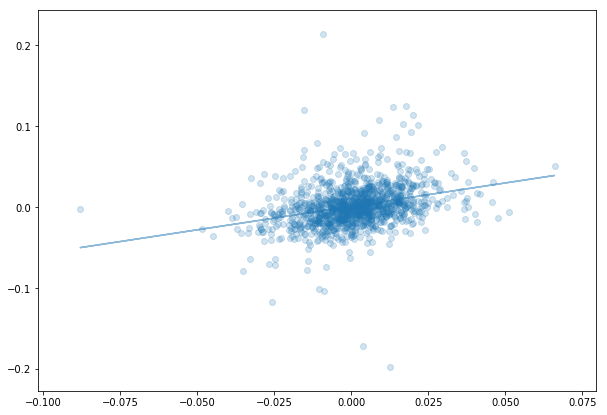

0.578432450511713

In [233]:
get_beta("BRKM5",start_date='2015-02-01',end_date='2020-02-01',plot_beta=True)

In [1]:
import yfinance as yf
import pandas as pd

In [200]:
bvsp = yf.Ticker("^BVSP")
    .history(period='5y',interval='1d')['Close']
    .pct_change(1)
    .dropna()
bvsp.head()

Date
2015-05-04    0.020007
2015-05-05    0.012170
2015-05-06   -0.016347
2015-05-07   -0.003187
2015-05-08    0.004006
Name: Close, dtype: float64

In [198]:
stock = yf.Ticker("MGLU3.SA")
stock = stock.history(period='5y',interval='1d')['Close'].pct_change(1).dropna()

stock.tail()

Date
2020-02-01   -0.094020
2020-03-01   -0.228231
2020-04-01    0.288511
2020-04-14    0.000000
2020-04-30   -0.006397
Name: Close, dtype: float64

In [199]:
table = pd.merge(bvsp,stock,left_index = True,right_index = True).iloc[1:]
table.columns = ['BVSP','STOCK']
table.head()

,Close_x,Close_y
Date,,
2015-07-01,-0.041748,7.000000
2015-08-01,-0.083338,-0.129464
2015-09-01,-0.033608,-0.425641
2015-10-01,0.017976,5.571429
2015-10-01,0.017976,0.000000


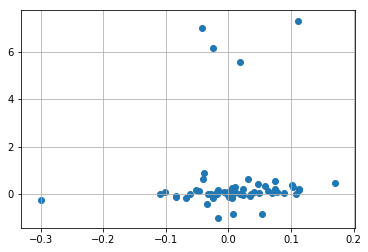

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline

xval,yval = table['BVSP'],table['STOCK']

plt.figure()
plt.scatter(xval,yval)
plt.grid()
plt.show()

In [185]:
import statsmodels.api as sm
from statsmodels import regression

x1 = sm.add_constant(table['BVSP'])
model = regression.linear_model.OLS(table['STOCK'],x1).fit()
model.params[1]

1.8617970272301743

In [212]:
table

,Close_x,Close_y
Date,,
2015-07-01,-0.041748,7.000000
2015-08-01,-0.083338,-0.129464
2015-09-01,-0.033608,-0.425641
2015-10-01,0.017976,5.571429
2015-10-01,0.017976,0.000000
2015-11-01,-0.016329,-0.987772
2015-12-01,-0.039229,0.888889
2016-01-01,-0.067912,-0.176471
2016-02-01,0.059100,0.357143


In [225]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression

def get_beta(stock,start_date,end_date,interval_='1d',plot_beta = False):
    bvsp = yf.Ticker("^BVSP").history(start=start_date,end=end_date,interval=interval_)['Close'].pct_change(1).dropna()
    stock = yf.Ticker(str(stock)+".SA").history(start=start_date,end=end_date,interval=interval_)['Close'].pct_change(1).dropna()
        
    table = pd.merge(bvsp,stock,left_index = True,right_index = True).iloc[1:]
    
    x1 = sm.add_constant(table.iloc[:,0])
    model = regression.linear_model.OLS(table.iloc[:,1],x1).fit()
    
    if plot_beta==True:
        X,Y = table.iloc[:,0],table.iloc[:,1]
        Y_hat = X*model.params[1]+model.params[0]
        
        plt.figure(figsize=(10,7))
        plt.scatter(X,Y,alpha=0.2)
        plt.plot(X,Y_hat,alpha=0.5)
        
        plt.show()
        
    
    return model.params[1]


In [231]:
get_beta("BRKM5",start_date='2015-02-01',end_date='2020-02-01',plot_beta=False)

0.578432450511713